In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


import pmdarima as pm
from pmdarima.model_selection import train_test_split

%matplotlib inline

### Get VTI history

In [2]:
vti = yf.Ticker("VTI")
vti_hist = vti.history(period="max")

#### Visualy look for trends

/Users/kevinevans/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


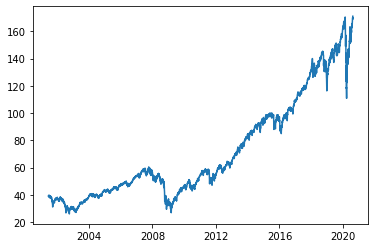

In [3]:
plt.plot(vti_hist.Close)
plt.savefig('images/vti_trend.png')


#### Create testing set

In [5]:
train, test = train_test_split(vti_hist.Close, train_size=.9)


#### Model

In [7]:
model = pm.auto_arima(train, seasonal=False)

/Users/kevinevans/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/kevinevans/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/kevinevans/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [8]:
forecasts = model.predict(test.shape[0])

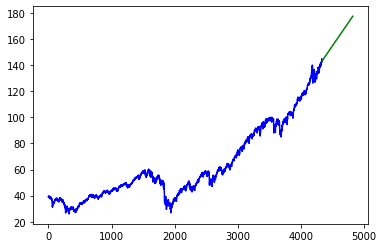

In [12]:
x = np.arange(vti_hist.Close.shape[0])
plt.plot(x[:len(train)], train, c='blue')
plt.plot(x[len(train):], forecasts, c='green')
plt.show()

In [ ]:
print("RMSE = ", np.sqrt(mean_squared_error(test.Close, preds)))
print("MAE = ", mean_absolute_error(test.Close, preds))